<a href="https://colab.research.google.com/github/ratnajit-dhar/SpaceshipTitanic-Prediction-Model-Kaggle/blob/main/SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: xlabel='VIP', ylabel='count'>

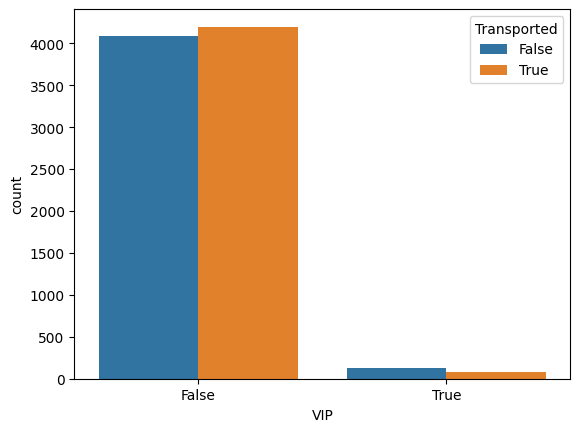

In [ ]:
sns.countplot(x="VIP",hue="Transported",data=train) #Vip er upor eto beshi depend kortese na, so drop korte pari

In [ ]:
train["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
train.drop(columns=["VIP"],axis=1,inplace=True)
test.drop(columns=["VIP"],axis=1,inplace=True)


<ipython-input-288-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

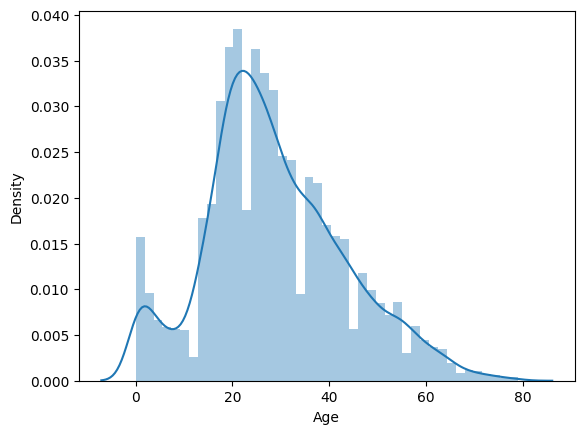

In [ ]:
sns.distplot(df['Age'])

<Axes: xlabel='Destination', ylabel='count'>

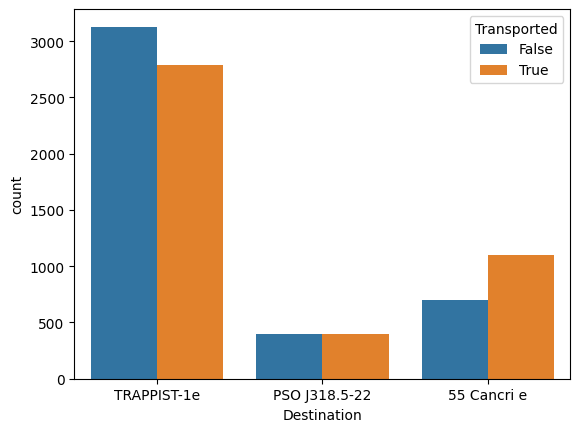

In [ ]:
sns.countplot(x="Destination",hue="Transported",data=train)

<Axes: xlabel='Age', ylabel='count'>

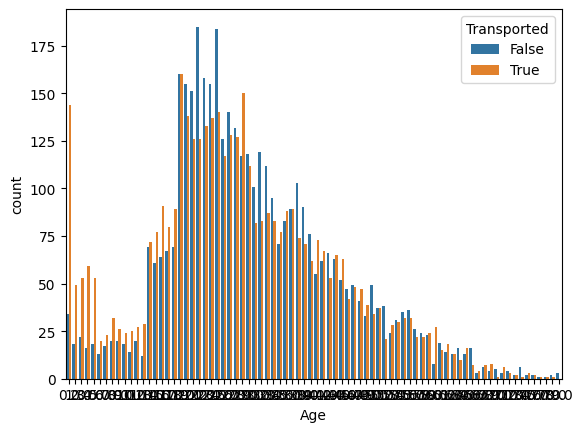

In [ ]:
sns.countplot(x="Age",hue="Transported",data=train) #kom boyoshi ar briddhoder transport howar tendancy beshi

In [ ]:
train.drop(columns=["Name"],axis=1,inplace=True)
test.drop(columns=["Name"],axis=1,inplace=True)

#**Encoding Categorical Data of Homeplanet,Destination and CryoSleep into numerical and then into one hot encoding**

In [ ]:
train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
# categories = {"Earth":0,"Europa":1,"Mars":2}
# df["HomePlanetCategorized"] = df["HomePlanet"].map(categories)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
train['HomePlanetCategorized'] = label_encoder.fit_transform(train['HomePlanet'])
train['DestinationCategorized'] = label_encoder.fit_transform(train['Destination'])
train['CryoCategorized'] = label_encoder.fit_transform(train['CryoSleep'])
train['TransportCategorized'] = label_encoder.fit_transform(train['Transported'])
test['HomePlanetCategorized'] = label_encoder.fit_transform(test['HomePlanet'])
test['DestinationCategorized'] = label_encoder.fit_transform(test['Destination'])
test['CryoCategorized'] = label_encoder.fit_transform(test['CryoSleep'])
#test['TransportCategorized'] = label_encoder.fit_transform(test['Transported'])

train.drop(columns=["HomePlanet","Destination","CryoSleep","Transported"],axis=1,inplace=True)
test.drop(columns=["HomePlanet","Destination","CryoSleep"],axis=1,inplace=True)
train.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanetCategorized,DestinationCategorized,CryoCategorized,TransportCategorized
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,1,2,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,0,2,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,1,2,0,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,1,2,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,0,2,0,1


#**Taking only the side of Cabin in consideration**

In [ ]:
categories = train['Cabin'].astype(str).str[-1]
train["CabinCategorized"] = label_encoder.fit_transform(categories)
categories = test['Cabin'].astype(str).str[-1]
test["CabinCategorized"] = label_encoder.fit_transform(categories)

# **One Hot Encoding**

In [ ]:
train = pd.get_dummies(train,columns=["HomePlanetCategorized","DestinationCategorized",	"CryoCategorized", "CabinCategorized"])
test = pd.get_dummies(test,columns=["HomePlanetCategorized","DestinationCategorized",	"CryoCategorized", "CabinCategorized"])

In [ ]:
train.drop(columns = ["Cabin"],axis=1,inplace=True)
test.drop(columns = ["Cabin"],axis=1,inplace=True)
train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TransportCategorized,HomePlanetCategorized_0,HomePlanetCategorized_1,...,DestinationCategorized_0,DestinationCategorized_1,DestinationCategorized_2,DestinationCategorized_3,CryoCategorized_0,CryoCategorized_1,CryoCategorized_2,CabinCategorized_0,CabinCategorized_1,CabinCategorized_2
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
train = train.fillna(value={"RoomService":0,"FoodCourt":0,"Spa":0,"ShoppingMall":0,"VRDeck":0})
test = test.fillna(value={"RoomService":0,"FoodCourt":0,"Spa":0,"ShoppingMall":0,"VRDeck":0})

In [ ]:
train = train.fillna({'Age':-0.5})
test = test.fillna({'Age':-0.5})

# **Dividing Age into 7 agegroup**

In [ ]:
bins = [-1,0,5,12,19,30,45,60,np.inf]
labels = [0,1,2,3,4,5,6,7]

train['Agegroup'] = pd.cut(train['Age'],bins,labels=labels)
test['Agegroup'] = pd.cut(test['Age'],bins,labels=labels)

In [ ]:
train.drop(columns = ["Age"],axis=1,inplace=True)
test.drop(columns = ["Age"],axis=1,inplace=True)

# **Training and Predicting Model**

In [ ]:
train.columns

Index(['PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'TransportCategorized', 'HomePlanetCategorized_0',
       'HomePlanetCategorized_1', 'HomePlanetCategorized_2',
       'HomePlanetCategorized_3', 'DestinationCategorized_0',
       'DestinationCategorized_1', 'DestinationCategorized_2',
       'DestinationCategorized_3', 'CryoCategorized_0', 'CryoCategorized_1',
       'CryoCategorized_2', 'CabinCategorized_0', 'CabinCategorized_1',
       'CabinCategorized_2', 'Agegroup'],
      dtype='object')

In [ ]:
X_train = train[['PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanetCategorized_0',
       'HomePlanetCategorized_1', 'HomePlanetCategorized_2',
       'HomePlanetCategorized_3', 'DestinationCategorized_0',
       'DestinationCategorized_1', 'DestinationCategorized_2',
       'DestinationCategorized_3', 'CryoCategorized_0', 'CryoCategorized_1',
       'CryoCategorized_2', 'CabinCategorized_0', 'CabinCategorized_1',
       'CabinCategorized_2', 'Agegroup']]
Y_train = train[['TransportCategorized']]

#X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state=40)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

<ipython-input-304-d8b4c63535a2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
X_test = test[['PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanetCategorized_0',
       'HomePlanetCategorized_1', 'HomePlanetCategorized_2',
       'HomePlanetCategorized_3', 'DestinationCategorized_0',
       'DestinationCategorized_1', 'DestinationCategorized_2',
       'DestinationCategorized_3', 'CryoCategorized_0', 'CryoCategorized_1',
       'CryoCategorized_2', 'CabinCategorized_0', 'CabinCategorized_1',
       'CabinCategorized_2', 'Agegroup']]
X_test = scaler.fit_transform(X_test)
prediction = RFC.predict(X_test)

In [ ]:
diction = dict(zip(test['PassengerId'],prediction))
#diction
result = pd.DataFrame({'PassengerID':test['PassengerId'],'Transported':prediction})
result
result['Transported'] = result['Transported'].replace({0:False,1:True})
result.to_csv('SpaceshipTitanicPrediction.csv',index=False)